# 비음수 행렬 분해 실습

### 데이터 불러오기

In [1]:
from sklearn import datasets
raw_face = datasets.fetch_lfw_people(min_faces_per_person=20,        # 얼굴 데이터, 음성 데이터처럼 비음수 값 데이터로 실습
                                    resize= 0.5,
                                    color=False)

### 데이터 살펴보기

In [5]:
n_samples, h, w = raw_face.images.shape
print('n_samples: ', n_samples)
print('h: ', h)
print('w: ', w)

X = raw_face.data
n, p = X.shape
print('n: ', n, '\np: ', p)

y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print('k: ', k)

n_samples:  3023
h:  62
w:  47
n:  3023 
p:  2914
k:  62


### 트레이닝/테스트 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)

### 비음수 행렬 분해

In [8]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

C:\Users\hanao\anaconda3\envs\mlpract\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\hanao\anaconda3\envs\mlpract\lib\site-packages\sklearn\decomposition\_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


### 오리지널 데이터 시각화

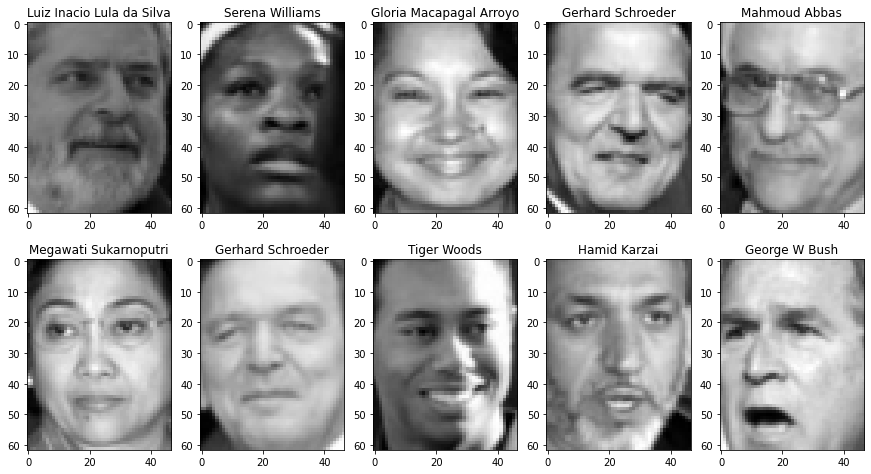

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h, w)))
    plt.title(target_names[y_tn[i]])
plt.show()

### 비음수 행렬 분해 요소 시각화

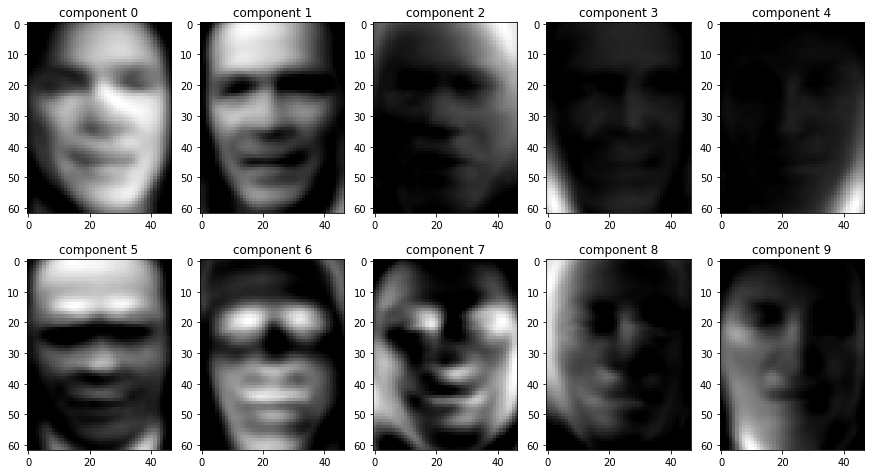

In [16]:
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h, w)))
    plt.title("component {}".format(i))
plt.show()